In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [8]:
df.shape

(42000, 785)

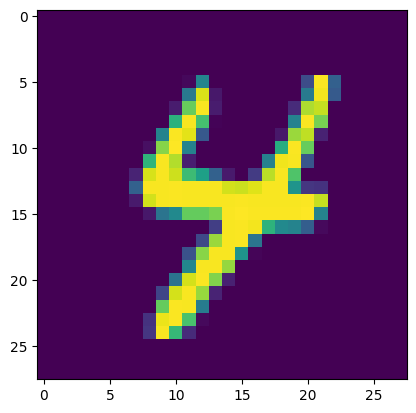

In [16]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[1243,1:].values.reshape(28,28))

In [42]:
# training a simple ml algorithm
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# using KNN algoithm.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
# knn is lazy and it will take longer time to predict the new point.
import time
start = time.time()
y_pred = knn.predict(X_test)
end = time.time()
print("Time taken for pred:", end-start)

Time taken for pred: 15.029734134674072


In [23]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9648809523809524


#### Now we'll use pca with lesser features and then predit.

In [44]:
# For that we need to scale the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100) # selecting the top 100 principal components.

In [45]:
# Now we'll find the principal components using the train data and then transform the whole data
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [46]:
X_train.shape, X_train_trf.shape

((33600, 784), (33600, 100))

In [47]:
# training the knn model.
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [48]:
y_pred = knn.predict(X_test_trf)

In [49]:
acc  = accuracy_score(y_pred, y_test)
acc

0.9535714285714286

In [53]:
# checking the accuracy for different principal components.
for i in range(30, 100):
    pca = PCA(i)
    X_train_trf_temp = pca.fit_transform(X_train)
    X_test_trf_temp = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf_temp, y_train)
    y_pred = knn.predict(X_test_trf_temp)
    acc = accuracy_score(y_pred, y_test)
    print("accuracy for: ",i, ": ", acc)

accuracy for:  30 :  0.9485714285714286
accuracy for:  31 :  0.9489285714285715
accuracy for:  32 :  0.950952380952381
accuracy for:  33 :  0.9508333333333333
accuracy for:  34 :  0.9503571428571429
accuracy for:  35 :  0.9526190476190476
accuracy for:  36 :  0.9521428571428572
accuracy for:  37 :  0.9510714285714286
accuracy for:  38 :  0.9519047619047619
accuracy for:  39 :  0.9530952380952381
accuracy for:  40 :  0.9519047619047619
accuracy for:  41 :  0.9510714285714286
accuracy for:  42 :  0.9526190476190476
accuracy for:  43 :  0.9530952380952381
accuracy for:  44 :  0.9530952380952381
accuracy for:  45 :  0.9538095238095238
accuracy for:  46 :  0.9520238095238095
accuracy for:  47 :  0.9534523809523809
accuracy for:  48 :  0.9533333333333334
accuracy for:  49 :  0.9523809523809523
accuracy for:  50 :  0.9532142857142857
accuracy for:  51 :  0.9532142857142857
accuracy for:  52 :  0.9538095238095238
accuracy for:  53 :  0.9553571428571429
accuracy for:  54 :  0.9542857142857143
a

In [54]:
# transforming to 2D coordinate system.
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [55]:
# PLOT
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:,0],
                y = X_train_trf[:,1],
                color = y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [56]:
# transforming in 3D
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [60]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x = X_train_trf[:,0],
                   y=X_train_trf[:,1], 
                   z=X_train_trf[:,2],
                   color=y_train_trf)

fig.show()

In [61]:
# explained variance- eigen values.
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [64]:
# finding the optimal number of principal components.
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [72]:
x = 0
cnt = 0
for i in pca.explained_variance_ratio_:
    x += (i*100)
    cnt += 1
    #print("x ", x)
    if x>=90: 
        break
print("No of components req for 90% var:-", cnt)

No of components req for 90% var:- 223
